In [78]:
%load_ext autoreload
%autoreload 2
from src.deep.data.data_analyzer import DataAnalyzer
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


the folder ../../data/datasets/iq/qam1024_160x20/160_samples_mu=0.001 contains 160 samples


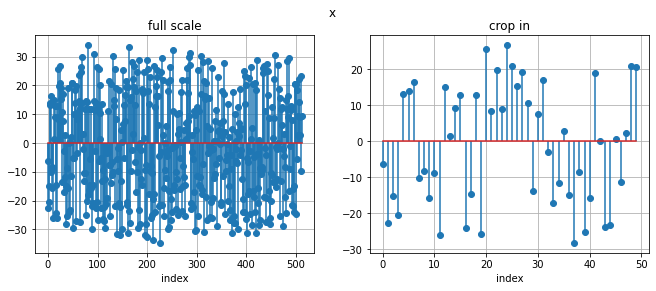

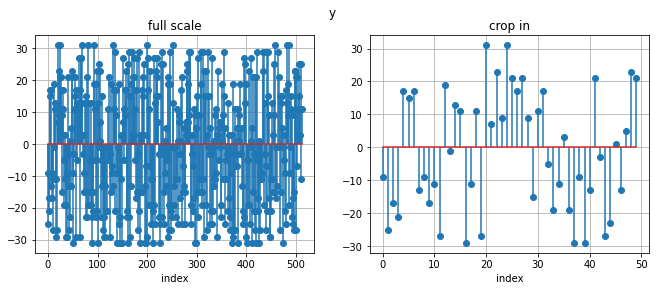

x_power=657.6012916242647
images saved to ../../data/datasets/iq/qam1024_160x20/_analyzation/160_samples_mu=0.001


In [79]:
root_dir = f'../../data/datasets/iq/qam1024_160x20'
data_analyzer = DataAnalyzer(root_dir,_tqdm=tqdm)
data_analyzer.plot_single_sample(mu=0.001,data_id=1,is_save=False)

In [86]:
data_analyzer.calc_ber_for_subfolder(mu=0.001, n=10)

  0%|          | 0/10 [00:00<?, ?it/s]

the avg ber of mu=0.001 (with 10 permutations) is 0.138671875


In [ ]:
data_analyzer.plot_full_ber_graph(n=5,is_save=False)

  0%|          | 0/21 [00:00<?, ?it/s]